In [16]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
import snntorch.spikeplot as splt

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


In [17]:
# Make a 3 layer SNN network with following neuron count on each layer:
# layer 1: 784 (28 * 28); layer 2: 1000; layer 3: 10
beta = .99
numInput, numHidden, numOut = 28 * 28, 1000, 10

# Initialize the layers
inputLayer = nn.Linear(numInput, numHidden)
lif1 = snn.Leaky(beta = beta)
hiddenLayer = nn.Linear(numHidden, numOut)
lif2 = snn.Leaky( beta = beta)

#  Keep track of memory
mem1 = lif1.init_leaky()
mem2 = lif2.init_leaky()

# record outputs
mem2_rec = []
spk1_rec = []
spk2_rec = []

numSteps = 200

# Input data
inputSpikes = spikegen.rate_conv(torch.rand((numSteps, numInput))).unsqueeze(1)


# network simulation
for step in range(numSteps):
    cur1 = inputLayer(inputSpikes[step]) # post-synaptic current <-- spk_in x weight
    spk1, mem1 = lif1(cur1, mem1) # mem[t+1] <--post-syn current + decayed membrane
    cur2 = hiddenLayer(spk1)
    spk2, mem2 = lif2(cur2, mem2)

    mem2_rec.append(mem2)
    spk1_rec.append(spk1)
    spk2_rec.append(spk2)

# convert lists to tensors
mem2_rec = torch.stack(mem2_rec)
spk1_rec = torch.stack(spk1_rec)
spk2_rec = torch.stack(spk2_rec)

In [5]:
import torch
torch.cuda.is_available()

True

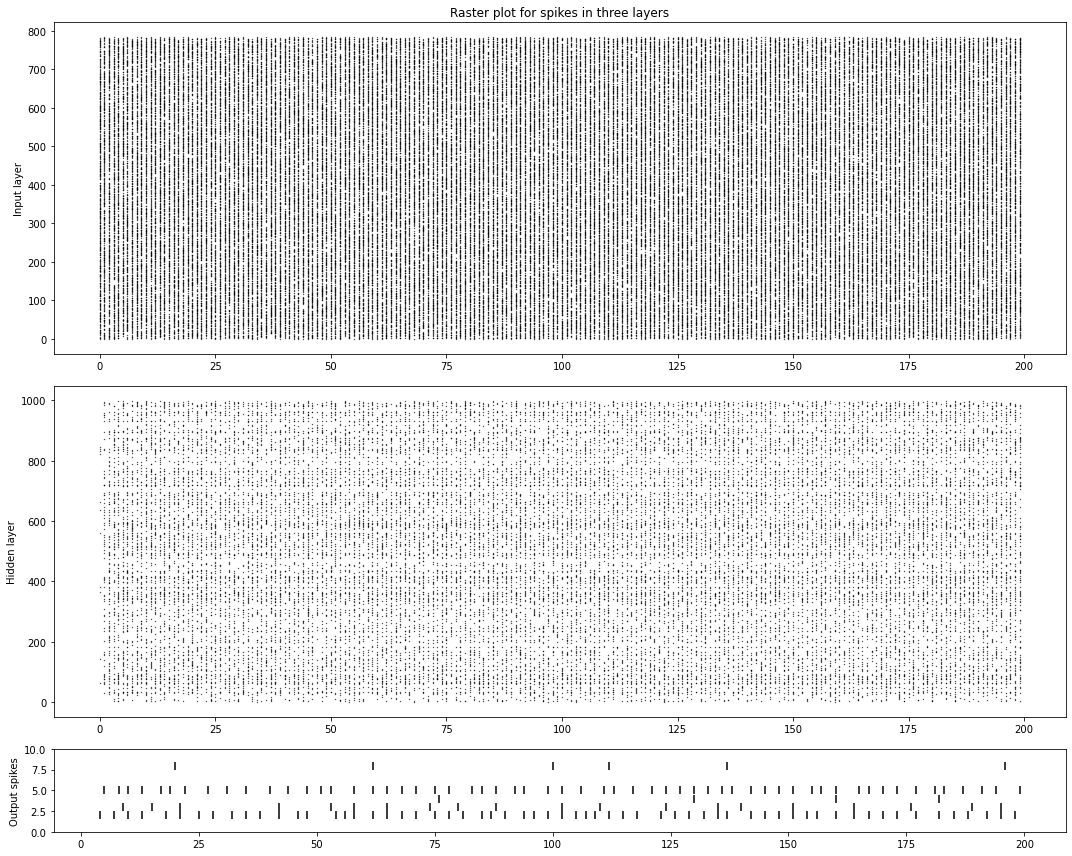

In [18]:
# Use only 1 batch
# Create figure and grid of subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), 
                                gridspec_kw={'height_ratios': [1, 1, .25]})

# First scatter plot
ax1.scatter(inputSpikes[:,0,:].nonzero()[:,0], inputSpikes[:,0,:].nonzero()[:,1], c='black', s=.1,)
ax1.set_ylabel('Input layer')
ax1.set_title("Raster plot for spikes in three layers")

# Second scatter plot
ax2.scatter(spk1_rec[:,0,:].nonzero()[:,0], spk1_rec[:,0,:].nonzero()[:,1], c='black', s=.1)
ax2.set_ylabel('Hidden layer')

# Third scatter plot
ax3.scatter(spk2_rec[:,0,:].nonzero()[:,0], spk2_rec[:,0,:].nonzero()[:,1], c='black', s=50, marker="|")
ax3.set_ylim(0,10)
ax3.set_ylabel('Output spikes')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()